In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
drop_final = ["press_mod","code_presentation", "code_module", "studied_credits"]

def drop_col (df, list):
    df.drop(columns=(list), inplace=True)
    return df


In [3]:
final_df = pd.read_csv("../data/processed/final_df.csv")

In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26721 entries, 0 to 26720
Data columns (total 13 columns):
id_student           26721 non-null int64
age_band             26721 non-null object
gender               26721 non-null object
highest_education    26721 non-null object
n_assignments        26721 non-null int64
mean_score           26702 non-null float64
final_result         26721 non-null object
total_clicks         26721 non-null int64
studied_credits      26721 non-null int64
region               26721 non-null object
code_module          26721 non-null object
code_presentation    26721 non-null object
press_mod            26721 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 2.7+ MB


In [5]:
#NEW Categorical COLUMNS 
#mean_score_treshold (bins) qcut cut
#0-40 = fail
#40-60 = pass
#60-80 = 
#80-100 = 

#age_band to numeric:




final_df.mean_score.describe()

count    26702.000000
mean        72.837888
std         15.560017
min          0.000000
25%         64.800000
50%         75.727273
75%         84.080357
max        100.000000
Name: mean_score, dtype: float64

In [6]:
final_df.describe()

,id_student,n_assignments,mean_score,total_clicks,studied_credits
count,2.672100e+04,26721.000000,26702.000000,26721.000000,26721.000000
mean,7.085816e+05,7.747315,72.837888,1792.429812,77.769357
std,5.540723e+05,4.542077,15.560017,2094.342100,39.026739
min,6.516000e+03,0.000000,0.000000,1.000000,30.000000
25%,5.058780e+05,4.000000,64.800000,460.000000,60.000000
50%,5.893270e+05,7.000000,75.727273,1082.000000,60.000000
75%,6.421960e+05,11.000000,84.080357,2383.000000,90.000000
max,2.698588e+06,28.000000,100.000000,28615.000000,630.000000


In [7]:
numerical_columns=['n_assignments', 'mean_score', 'total_clicks', 'studied_credits']

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26721 entries, 0 to 26720
Data columns (total 13 columns):
id_student           26721 non-null int64
age_band             26721 non-null object
gender               26721 non-null object
highest_education    26721 non-null object
n_assignments        26721 non-null int64
mean_score           26702 non-null float64
final_result         26721 non-null object
total_clicks         26721 non-null int64
studied_credits      26721 non-null int64
region               26721 non-null object
code_module          26721 non-null object
code_presentation    26721 non-null object
press_mod            26721 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 2.7+ MB


In [9]:
final_df.head()

,id_student,age_band,gender,highest_education,n_assignments,mean_score,final_result,total_clicks,studied_credits,region,code_module,code_presentation,press_mod
0,11391,55<=,M,HE Qualification,5,82.0,Pass,934,240,East Anglian Region,AAA,2013J,2013J-AAA
1,28400,35-55,F,HE Qualification,5,66.4,Pass,1435,60,Scotland,AAA,2013J,2013J-AAA
2,31604,35-55,F,A Level or Equivalent,5,76.0,Pass,2158,60,South East Region,AAA,2013J,2013J-AAA
3,32885,0-35,F,Lower Than A Level,5,54.4,Pass,1034,60,West Midlands Region,AAA,2013J,2013J-AAA
4,38053,35-55,M,A Level or Equivalent,5,68.0,Pass,2445,60,Wales,AAA,2013J,2013J-AAA


In [10]:
final_df.highest_education.unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [11]:
score_age_df = pd.DataFrame(data=final_df, columns=["mean_score","age_band"])

#### Meet our students

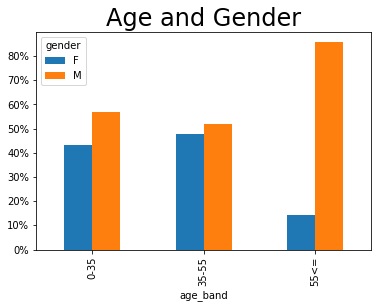

In [25]:
final_df.groupby(['age_band','gender']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Age and Gender', fontsize=24)
plt.savefig('age_gender.png', bbox_inches='tight')
plt.show()


Generally speaking, males are more prone to enroll in OU.\
There are aprox 20% more males in the <35 age range.\
In the 35-55 age range there aren´t any significant gender differences.\
Only 10% of women 55 and older form our students DB against more than 80% of males. 


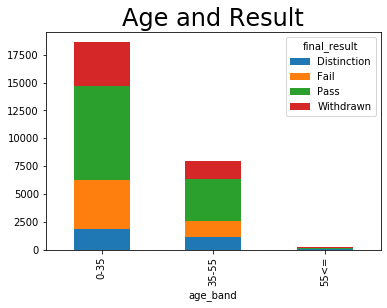

In [26]:

final_df.groupby(['age_band','final_result']).size().unstack().plot(kind='bar',stacked=True)

plt.title('Age and Result', fontsize=24)
plt.savefig('age_result.png', bbox_inches='tight')
plt.show()


Most of OU students (more than 65%) fall in the 0-35 years old range.\
We can also find the higher percentage of passing students in the same age group (0-35).

#### How does the educational degree affect the result?

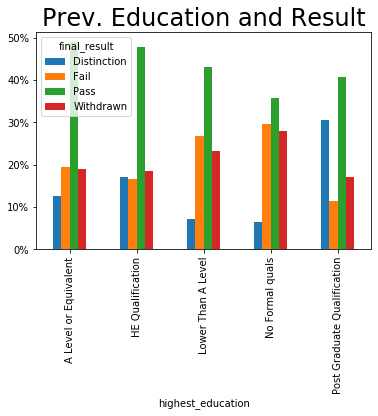

In [27]:

final_df.groupby(['highest_education', 'final_result']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Prev. Education and Result', fontsize=24)
plt.savefig('ed_result.png', bbox_inches='tight')
plt.show()

People with A level degrees have the highest percentage of passing students, about 50%. Followed by people with Higher Education degrees.\
It´s not surprinsing that students with a post-grad degree is the group with the highest percentange of people passing with distinction. Its also noticiable that this is the group with the lowest fail/withdrawn percentage.\
Amongst the people with no formal qualification, less than half make it. Out of those, about 5% do it with distinction. 

#### Top five regions with more students. How did they do?

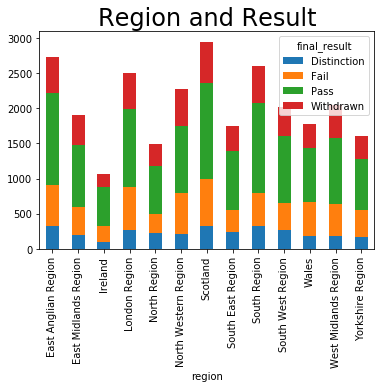

In [28]:

final_df.groupby(['region','final_result']).size().unstack().plot(kind='bar',stacked=True, mark_right = True )
plt.title('Region and Result', fontsize=24)
plt.savefig('region_result.png', bbox_inches='tight')
plt.show()

#can I add final_result percentage?

The top five regions where OU is more popular are:\
        1)Scotland\
        2)East Aglian Region\
        3)South Region\
        4)London Region\
        5)North Western Region\
    

In [16]:
from matplotlib.ticker import AutoMinorLocator

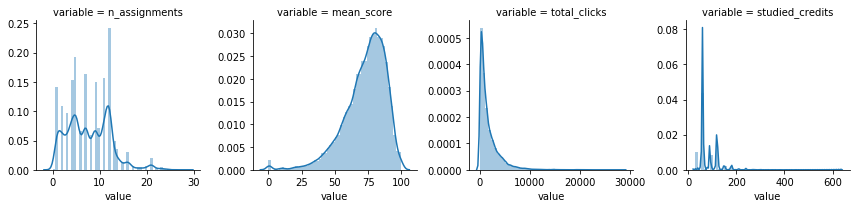

In [17]:
#Useless

def histograms_numeric_columns(df, numerical_columns):
    f = pd.melt(df, value_vars=numerical_columns) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

histograms_numeric_columns(final_df, numerical_columns)

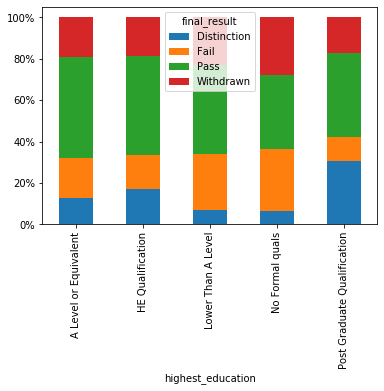

In [18]:
final_df.groupby(['highest_education','final_result']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#If I use qty yn the Y axis, can I add % in the stackable area?

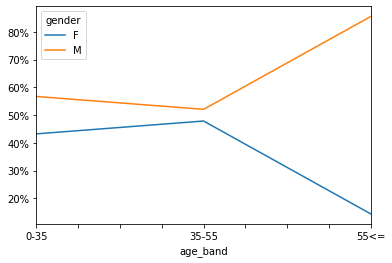

In [19]:
final_df.groupby(['age_band','gender']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot()

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

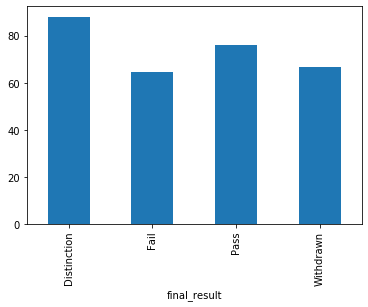

In [20]:
final_df.groupby("final_result")['mean_score'].mean().plot(kind='bar')

I find it interesting that students who fail or withdraw had obtained a mean grater than 40 (passing grade) in the assessments they turned in. This could mena they abandoned the program for external reasons and not because of actually failing the assessments. 

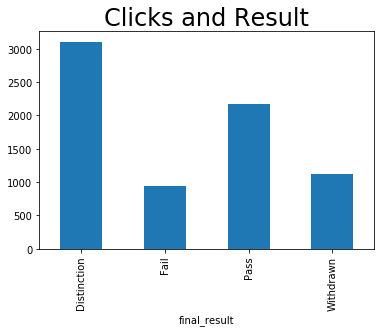

In [29]:
final_df.groupby("final_result")['total_clicks'].mean().plot(kind='bar')

plt.title('Clicks and Result', fontsize=24)
plt.savefig('clicks_result.png', bbox_inches='tight')

This graph on the other hand, does show that people who failed or withdrew, engaged half or less than half the activity (total_clicks) than people who passed (with and without distinction).\
People who passed with distinction had the higher activity in the VLE, more than 3000 clicks. 